In [6]:
import backtester272 as bt
import pandas as pd
import numpy as np

# Load Datas

In [7]:
# Load data

weights = pd.read_excel('data/Master 272 - AM - Projet indices.xlsx', sheet_name='Composition MSCI World', skiprows=0, index_col=0, engine='openpyxl')
weights.fillna(0, inplace=True)
weights.index = pd.to_datetime(weights.index, format='%Y-%m-%d')

prices = pd.read_csv('data/msci_prices.csv', index_col=0)
prices.index = pd.to_datetime(prices.index, format='%Y-%m-%d')

prices = bt.Backtester.handle_missing_data(prices)

dict_universe = {}

for date in weights.index:
    # Sélectionner les colonnes non nulles pour cette date
    non_zero_columns = weights.loc[date][weights.loc[date] != 0].index
    valid_columns = [col for col in non_zero_columns if col in prices.columns]
    weights = weights.loc[:, weights.columns.isin(prices.columns)]
    weights.loc[date] = weights.loc[date] / weights.loc[date].sum()
    dict_universe[date.strftime('%Y-%m-%d')] = list(valid_columns)

In [8]:
wip = bt.Backtester(prices, dates_universe=dict_universe, benchmark_weights=weights)

start_date = weights.index[0].strftime('%Y-%m-%d')
end_date = weights.index[-1].strftime('%Y-%m-%d')

global_params_to_retreive_bench = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30,
    'window': 30,
    'aum': 100,
    'transaction_cost': 0
}

EW = wip.run(**global_params_to_retreive_bench, strategy=bt.EqualWeightStrategy())

benchmark = EW.benchmark

In [ ]:
start_date = weights.index[0].strftime('%Y-%m-%d')
end_date = weights.index[-1].strftime('%Y-%m-%d')

global_params_monthly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 1,
    'window': 30 * 12,
    'aum': 100,
    'transaction_cost': 0
}

global_params_quarterly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 3,
    'window': 30 * 12,
    'aum': 100,
    'transaction_cost': 0
}


MLOEWDecile = wip.run(**global_params_monthly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.1), name='Monthly - LOEWDecile')
MLOEWQuintile = wip.run(**global_params_monthly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.2), name='Monthly - LOEWQuintile')
MLOEWQuartile = wip.run(**global_params_monthly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.25), name='Monthly - LOEWQuartile')

QLOEWDecile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.1), name='Quarterly - LOEWDecile')
QLOEWQuintile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.2), name='Quarterly - LOEWQuintile')
QLOEWQuartile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.25), name='Quarterly - LOEWQuartile')


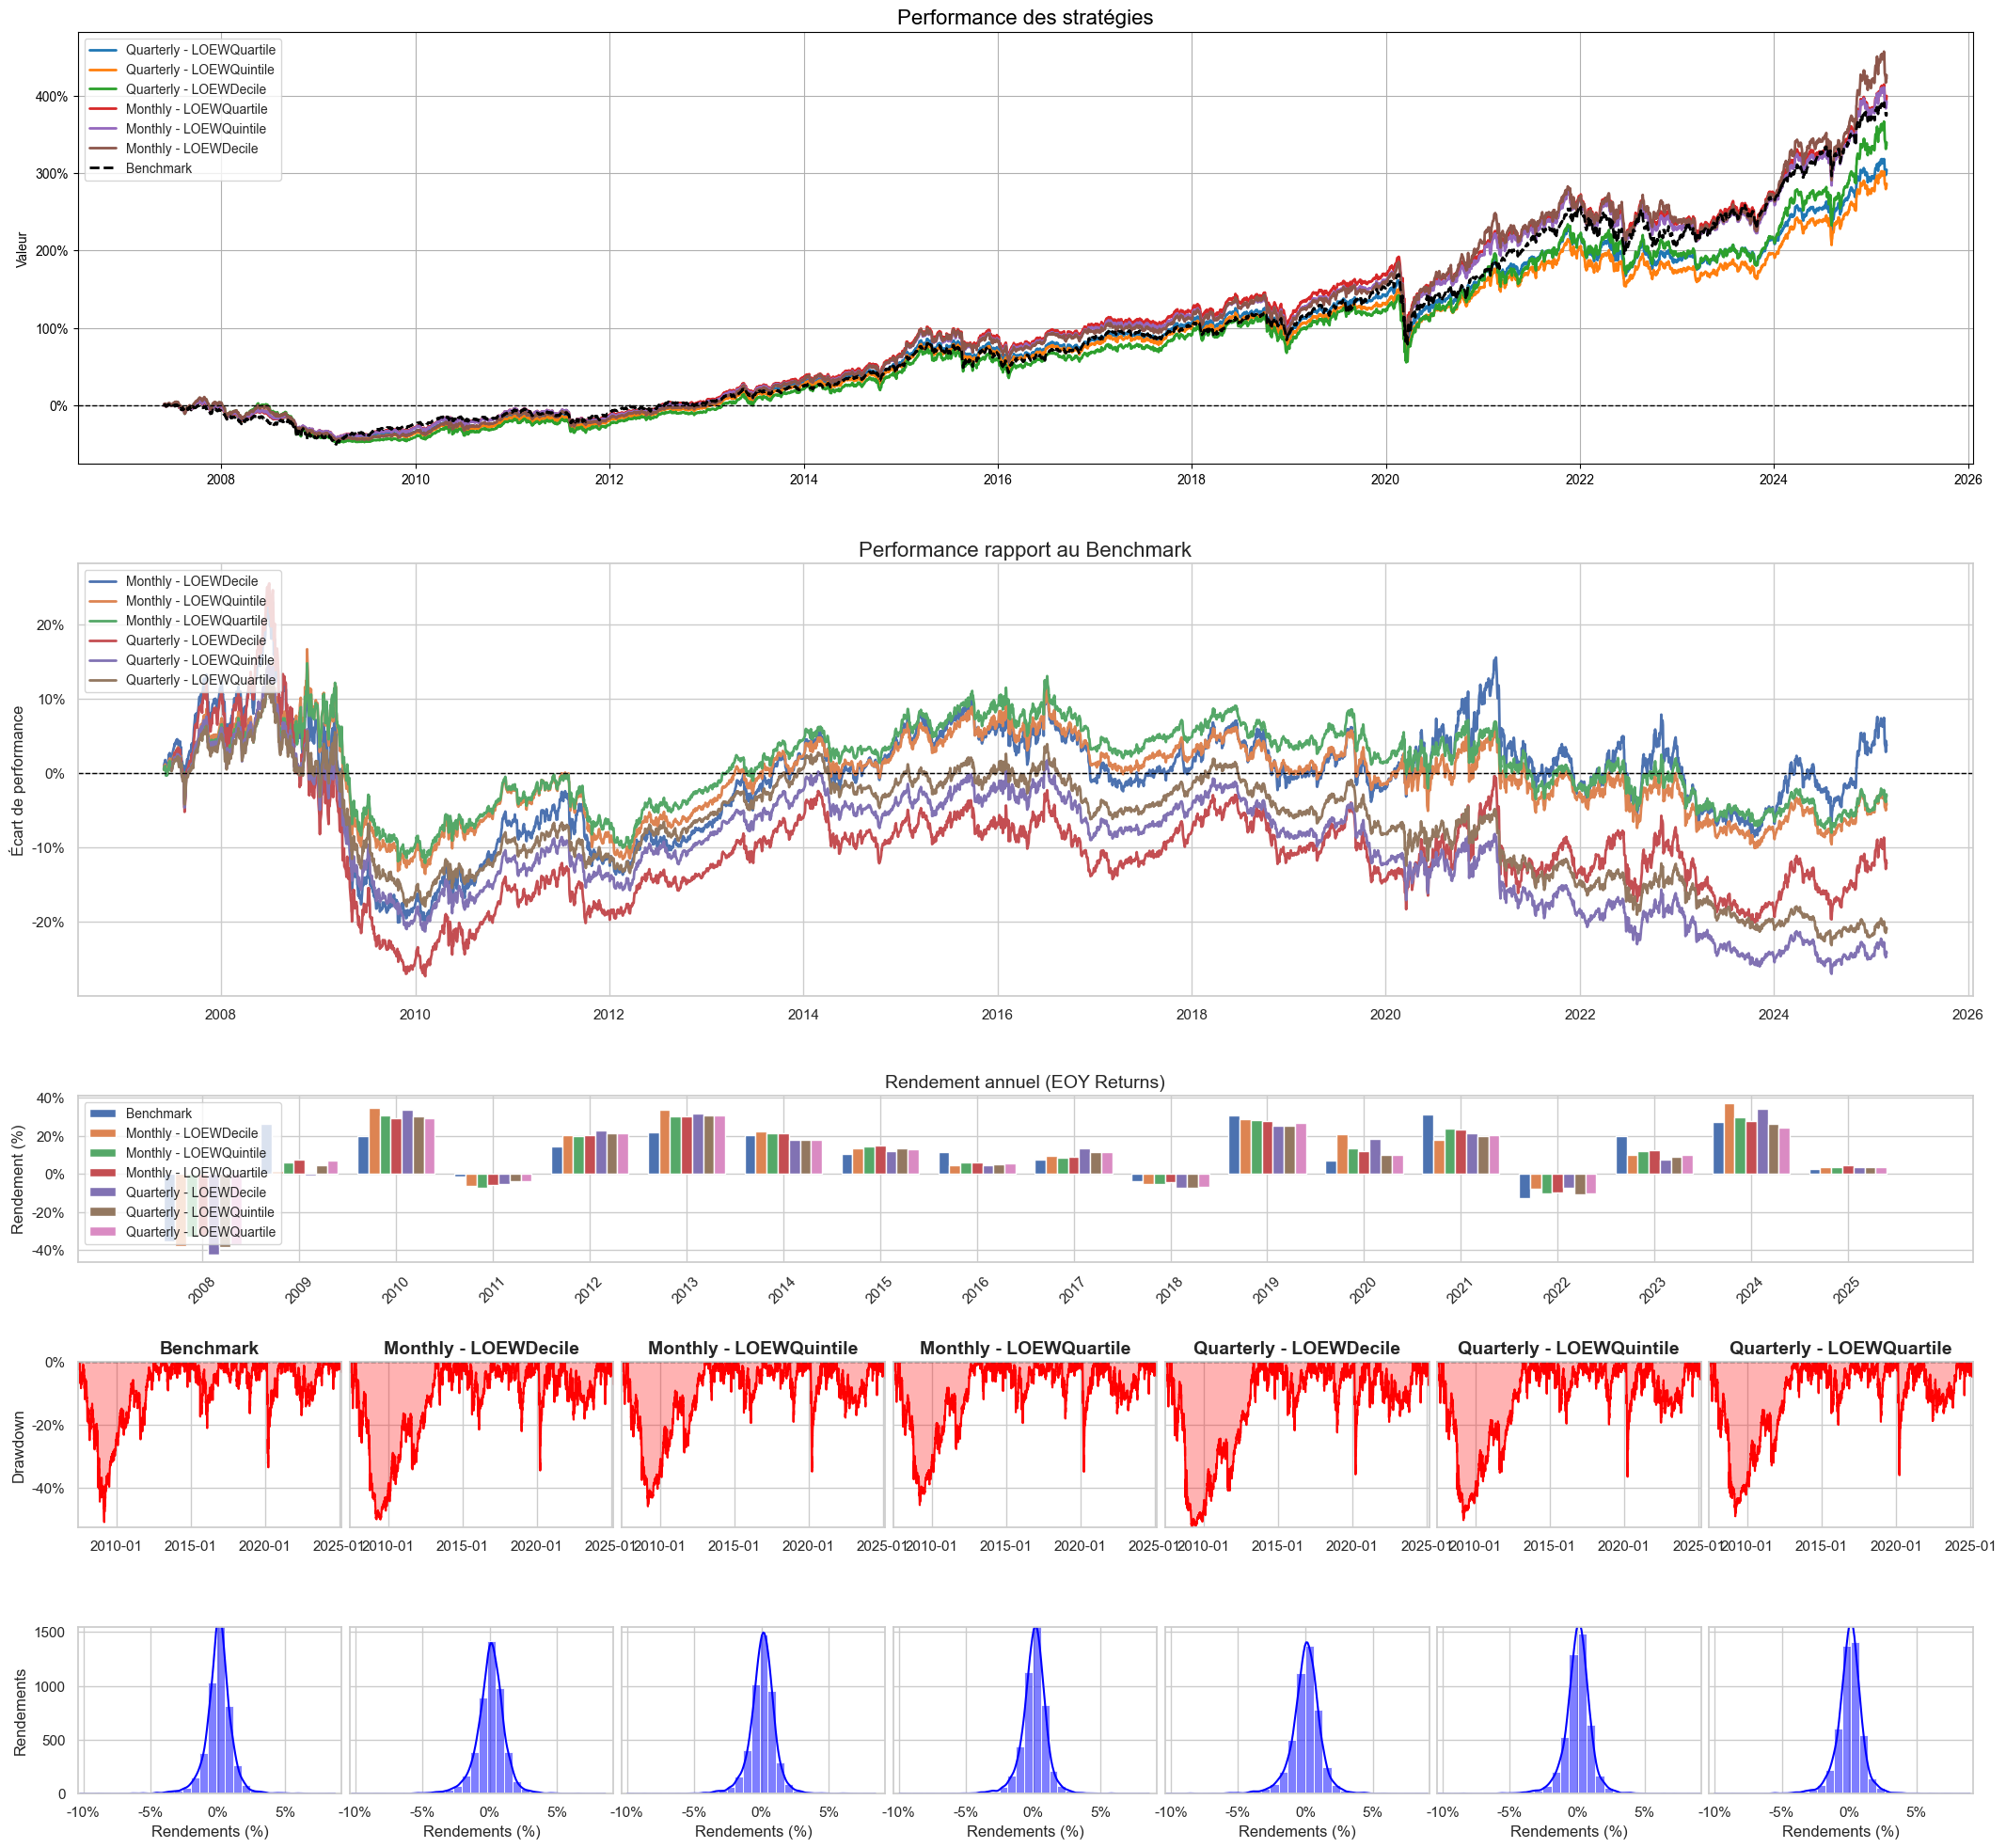

|                              | Benchmark   | Monthly - LOEWDecile   | Monthly - LOEWQuintile   | Monthly - LOEWQuartile   | Quarterly - LOEWDecile   | Quarterly - LOEWQuintile   | Quarterly - LOEWQuartile   |
|:-----------------------------|:------------|:-----------------------|:-------------------------|:-------------------------|:-------------------------|:---------------------------|:---------------------------|
| Performance                  | 380.15%     | 426.40%                | 392.38%                  | 399.49%                  | 339.41%                  | 286.16%                    | 304.18%                    |
| CAGR                         | 9.07%       | 9.63%                  | 9.22%                    | 9.31%                    | 8.58%                    | 7.80%                      | 8.08%                      |
| Volatility                   | 16.03%      | 17.21%                 | 15.52%                   | 15.12%                   | 17.78%                   | 15.

In [5]:
MLOEWDecile.compare(MLOEWQuintile, MLOEWQuartile, QLOEWDecile, QLOEWQuintile, QLOEWQuartile)

In [9]:
start_date = "2023-01-01"#weights.index[0].strftime('%Y-%m-%d')
end_date = weights.index[-1].strftime('%Y-%m-%d')

global_params_monthly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 1,
    'window': 30 * 12,
    'aum': 100,
    'transaction_cost': 0
}

global_params_quarterly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 3,
    'window': 30 * 12,
    'aum': 100,
    'transaction_cost': 0
}

MiMOMLOEWDecile = wip.run(**global_params_monthly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.1, benchmark=benchmark), name='Monthly - iMOMLOEWDecile')


Processing assets: 100%|██████████| 1468/1468 [03:02<00:00,  8.03it/s]


OXY US Equity     3.886603
WRB US Equity     2.975386
TMUS US Equity    2.842757
KEP SP Equity     2.614490
NOC US Equity     2.529024
                    ...   
TWLO US Equity   -2.724956
SWK US Equity    -2.734663
4188 JP Equity   -2.744565
LCID US Equity   -2.906633
TREX US Equity   -3.357029
Length: 1468, dtype: float64


Processing assets: 100%|██████████| 1467/1467 [03:04<00:00,  7.93it/s]


WRB US Equity     2.844006
NOC US Equity     2.671575
MCK US Equity     2.510785
LLY US Equity     2.405396
HSY US Equity     2.385802
                    ...   
MTCH US Equity   -2.793355
WBD US Equity    -2.793813
MU US Equity     -2.838362
SNAP US Equity   -2.919495
TWLO US Equity   -3.244565
Length: 1467, dtype: float64


Processing assets: 100%|██████████| 1467/1467 [03:03<00:00,  8.01it/s]


LW US Equity      2.243194
RGA US Equity     2.110346
GIS US Equity     2.061726
4568 JP Equity    2.015676
CPB US Equity     1.949325
                    ...   
WBD US Equity    -2.694196
TWLO US Equity   -3.036258
SNAP US Equity   -3.248687
8601 JP Equity   -3.358610
8473 JP Equity   -3.367954
Length: 1467, dtype: float64


Processing assets: 100%|██████████| 1443/1443 [02:56<00:00,  8.20it/s]


PGR US Equity     1.817433
RGA US Equity     1.807520
CMI US Equity     1.802881
YUMC US Equity    1.661063
LW US Equity      1.629578
                    ...   
SGRO LN Equity   -2.404432
J US Equity      -2.521510
SNAP US Equity   -2.588537
SCAA SS Equity   -2.802182
BXP US Equity    -3.039357
Length: 1443, dtype: float64


Processing assets: 100%|██████████| 1443/1443 [02:57<00:00,  8.14it/s]


DECK US Equity     2.454165
4922 JP Equity     2.285540
AZO US Equity      2.117928
PGR US Equity      2.116374
SBUX US Equity     2.113797
                     ...   
ELAN US Equity    -1.892972
MTCH US Equity    -1.901419
STERV FH Equity   -1.946550
INTC US Equity    -2.077850
9766 JP Equity    -2.588614
Length: 1443, dtype: float64


Processing assets: 100%|██████████| 1442/1442 [02:57<00:00,  8.13it/s]


DECK US Equity    3.841043
DKS US Equity     3.247481
4922 JP Equity    3.176593
DRI US Equity     3.124987
SBUX US Equity    3.016898
                    ...   
9766 JP Equity   -1.766293
AVTR US Equity   -1.814956
TSN US Equity    -1.878544
MTCH US Equity   -2.060746
ZM US Equity     -2.190389
Length: 1442, dtype: float64


Processing assets: 100%|██████████| 1437/1437 [03:05<00:00,  7.75it/s]


PCG US Equity        3.921423
DRI US Equity        3.128397
IVN CN Equity        2.562582
SBUX US Equity       2.235253
CS FP Equity         2.215283
                       ...   
ELAN US Equity      -2.440394
TELIA SS Equity     -2.538495
EMBRACB SS Equity   -2.569622
TSN US Equity       -2.655865
7203 JP Equity      -3.096243
Length: 1437, dtype: float64


Processing assets: 100%|██████████| 1439/1439 [03:15<00:00,  7.37it/s]


PCG US Equity      1.973009
MUV2 GY Equity     1.946045
HCA US Equity      1.893335
ACGL US Equity     1.858278
MRK US Equity      1.785734
                     ...   
TELIA SS Equity   -2.612039
FFIV US Equity    -2.639175
D US Equity       -2.692563
4005 JP Equity    -2.750621
AZRG IT Equity    -2.766200
Length: 1439, dtype: float64


Processing assets: 100%|██████████| 1440/1440 [03:13<00:00,  7.43it/s]


RAA GY Equity     2.876214
ACGL US Equity    2.418119
AIR FP Equity     2.412499
SAP GY Equity     2.407687
EXO NA Equity     2.267519
                    ...   
FIS US Equity    -2.258739
AZRG IT Equity   -2.292121
PLUG US Equity   -2.508461
TIXT CN Equity   -2.640135
D US Equity      -4.311374
Length: 1440, dtype: float64


Processing assets: 100%|██████████| 1381/1381 [03:12<00:00,  7.17it/s]


G IM Equity       5.705654
MUV2 GY Equity    4.804464
ABF LN Equity     4.274347
VIE FP Equity     3.712815
SBRY LN Equity    3.708827
                    ...   
K US Equity      -2.605883
AZRG IT Equity   -2.652209
LHX US Equity    -2.741029
D US Equity      -2.914160
DVN US Equity    -4.042113
Length: 1381, dtype: float64


Processing assets: 100%|██████████| 1381/1381 [03:14<00:00,  7.11it/s]


SYK US Equity     3.248273
ABF LN Equity     2.808061
SBRY LN Equity    2.736700
MUV2 GY Equity    2.599986
G IM Equity       2.477679
                    ...   
RPRX US Equity   -2.523045
ENPH US Equity   -2.559177
2413 JP Equity   -3.538164
SYY US Equity    -3.593513
AZRG IT Equity   -4.317216
Length: 1381, dtype: float64


Processing assets: 100%|██████████| 1378/1378 [03:11<00:00,  7.19it/s]


GWO CN Equity     3.942622
GE US Equity      3.837822
CRM US Equity     3.836351
G IM Equity       3.764893
RACE IM Equity    2.995195
                    ...   
MRNA US Equity   -2.733700
NOC US Equity    -2.815111
ENPH US Equity   -3.820930
AZRG IT Equity   -4.013067
PFE US Equity    -4.557475
Length: 1378, dtype: float64


Processing assets: 100%|██████████| 1377/1377 [03:08<00:00,  7.31it/s]


7911 JP Equity     2.959288
G IM Equity        2.899024
CRM US Equity      2.892296
META US Equity     2.614496
GE US Equity       2.520947
                     ...   
AMCR US Equity    -2.416977
CHP-U CN Equity   -2.693250
DIA IM Equity     -2.731107
VFC US Equity     -2.823272
AAL LN Equity     -4.014448
Length: 1377, dtype: float64


Processing assets: 100%|██████████| 1374/1374 [08:19<00:00,  2.75it/s]  


7911 JP Equity    2.679795
G IM Equity       2.668511
GE US Equity      2.637581
8725 JP Equity    2.604854
META US Equity    2.429689
                    ...   
MQG AU Equity    -2.684425
BOL SS Equity    -2.688010
TEP FP Equity    -2.791969
AAL LN Equity    -2.956526
ETSY US Equity   -2.979965
Length: 1374, dtype: float64


Processing assets: 100%|██████████| 1374/1374 [03:01<00:00,  7.56it/s]


8725 JP Equity     3.617359
FCNCA US Equity    3.390790
SUN AU Equity      2.778236
META US Equity     2.724056
G IM Equity        2.705054
                     ...   
MTD US Equity     -2.285693
EL US Equity      -2.288428
TEP FP Equity     -2.337763
G US Equity       -2.390665
AFX GY Equity     -2.392277
Length: 1374, dtype: float64


Processing assets: 100%|██████████| 1305/1305 [02:49<00:00,  7.70it/s]


LII US Equity     2.773291
MLM US Equity     2.701979
6201 JP Equity    2.579457
SUN AU Equity     2.545646
TLX GY Equity     2.488776
                    ...   
4151 JP Equity   -2.409688
RHC AU Equity    -2.483542
83 HK Equity     -2.510558
1929 HK Equity   -2.657132
EL US Equity     -2.927973
Length: 1305, dtype: float64


Processing assets: 100%|██████████| 1305/1305 [02:47<00:00,  7.79it/s]


WMB US Equity      4.420882
ADBE US Equity     2.822654
MET US Equity      2.622579
PRU US Equity      2.602742
TEN IM Equity      2.414204
                     ...   
HSY US Equity     -2.753763
GIS US Equity     -2.977293
1929 HK Equity    -2.977412
2267 JP Equity    -3.137411
ELISA FH Equity   -4.899072
Length: 1305, dtype: float64


Processing assets: 100%|██████████| 1305/1305 [02:41<00:00,  8.08it/s]


ROP US Equity      2.513070
CME US Equity      2.365136
LOGN SE Equity     2.276959
DLR US Equity      2.227157
CBOE US Equity     2.201730
                     ...   
HSY US Equity     -2.576244
ELISA FH Equity   -2.847465
1 HK Equity       -3.079400
1876 HK Equity    -3.205022
2267 JP Equity    -3.404418
Length: 1305, dtype: float64


Processing assets: 100%|██████████| 1304/1304 [02:41<00:00,  8.06it/s]


TW US Equity       3.142028
1925 JP Equity     2.569668
CBOE US Equity     2.518387
WMG US Equity      2.504162
8601 JP Equity     2.324906
                     ...   
CPR IM Equity     -2.530640
6963 JP Equity    -2.561474
ELISA FH Equity   -2.648508
PRU LN Equity     -2.996495
2267 JP Equity    -3.029622
Length: 1304, dtype: float64


Processing assets: 100%|██████████| 1302/1302 [02:54<00:00,  7.44it/s]


6178 JP Equity    3.021296
7182 JP Equity    2.596853
REL LN Equity     2.385089
PINS US Equity    2.362267
DTE GY Equity     2.314172
                    ...   
RI FP Equity     -2.258215
PRU LN Equity    -2.303443
KER FP Equity    -2.309284
BAYN GY Equity   -2.361109
4503 JP Equity   -2.485749
Length: 1302, dtype: float64


Processing assets: 100%|██████████| 1303/1303 [05:09<00:00,  4.20it/s]


PINS US Equity      2.234270
NSISB DC Equity     2.159967
BAH US Equity       2.156177
LIFCOB SS Equity    2.129668
ALL US Equity       2.066444
                      ...   
4523 JP Equity     -2.250690
APA US Equity      -2.730366
BAYN GY Equity     -2.732957
9042 JP Equity     -2.778939
4503 JP Equity     -4.034795
Length: 1303, dtype: float64


Processing assets: 100%|██████████| 1247/1247 [04:47<00:00,  4.34it/s]


SGRO LN Equity    4.553565
ALLY US Equity    3.832775
COF US Equity     3.577250
LAMR US Equity    3.399154
FITB US Equity    3.325213
                    ...   
4523 JP Equity   -1.949282
APA US Equity    -2.028453
1876 HK Equity   -2.103303
BAYN GY Equity   -2.111933
YUMC US Equity   -2.419779
Length: 1247, dtype: float64


Processing assets: 100%|██████████| 1247/1247 [04:39<00:00,  4.45it/s]


ALLY US Equity     5.016387
COF US Equity      3.913562
DFS US Equity      3.894994
SEBA SS Equity     3.560989
SWEDA SS Equity    3.366761
                     ...   
BAYN GY Equity    -1.836470
4523 JP Equity    -1.993764
UHRN SE Equity    -2.009727
1876 HK Equity    -2.515414
PRU LN Equity     -2.694629
Length: 1247, dtype: float64


Processing assets: 100%|██████████| 1246/1246 [04:47<00:00,  4.34it/s]


SEBA SS Equity     3.122104
AXP US Equity      2.937490
FFH CN Equity      2.902431
PG US Equity       2.797736
SWEDA SS Equity    2.748317
                     ...   
NKE US Equity     -2.102768
PRU LN Equity     -2.110611
BA US Equity      -2.269681
DSY FP Equity     -2.338407
UHRN SE Equity    -2.788906
Length: 1246, dtype: float64


Processing assets: 100%|██████████| 1245/1245 [04:45<00:00,  4.36it/s]


DOV US Equity     3.535288
TDG US Equity     3.146611
AXP US Equity     2.994007
PG US Equity      2.894951
GE US Equity      2.882263
                    ...   
PRU LN Equity    -1.979183
SIRI US Equity   -2.006011
SNOW US Equity   -2.132075
EDEN FP Equity   -2.288538
DSY FP Equity    -2.466347
Length: 1245, dtype: float64


Processing assets: 100%|██████████| 1244/1244 [04:44<00:00,  4.37it/s]


NN NA Equity       4.042281
PST IM Equity      3.548625
GE US Equity       3.535602
GMG AU Equity      3.079777
ISP IM Equity      2.960599
                     ...   
NESTE FH Equity   -2.140597
DSY FP Equity     -2.169619
KER FP Equity     -2.193532
WBA US Equity     -2.342937
4661 JP Equity    -2.743439
Length: 1244, dtype: float64


Processing assets: 100%|██████████| 1245/1245 [04:48<00:00,  4.32it/s]


8001 JP Equity    3.074904
GE US Equity      3.032023
ABBN SE Equity    2.882514
ISP IM Equity     2.581875
GJF NO Equity     2.497660
                    ...   
KER FP Equity    -2.609436
6273 JP Equity   -2.644542
INTC US Equity   -2.705676
6902 JP Equity   -2.780187
4661 JP Equity   -3.335456
Length: 1245, dtype: float64


/Users/julesmourgues/Documents/Cours/Master Dauphine/AM Comportementale/AM 3/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


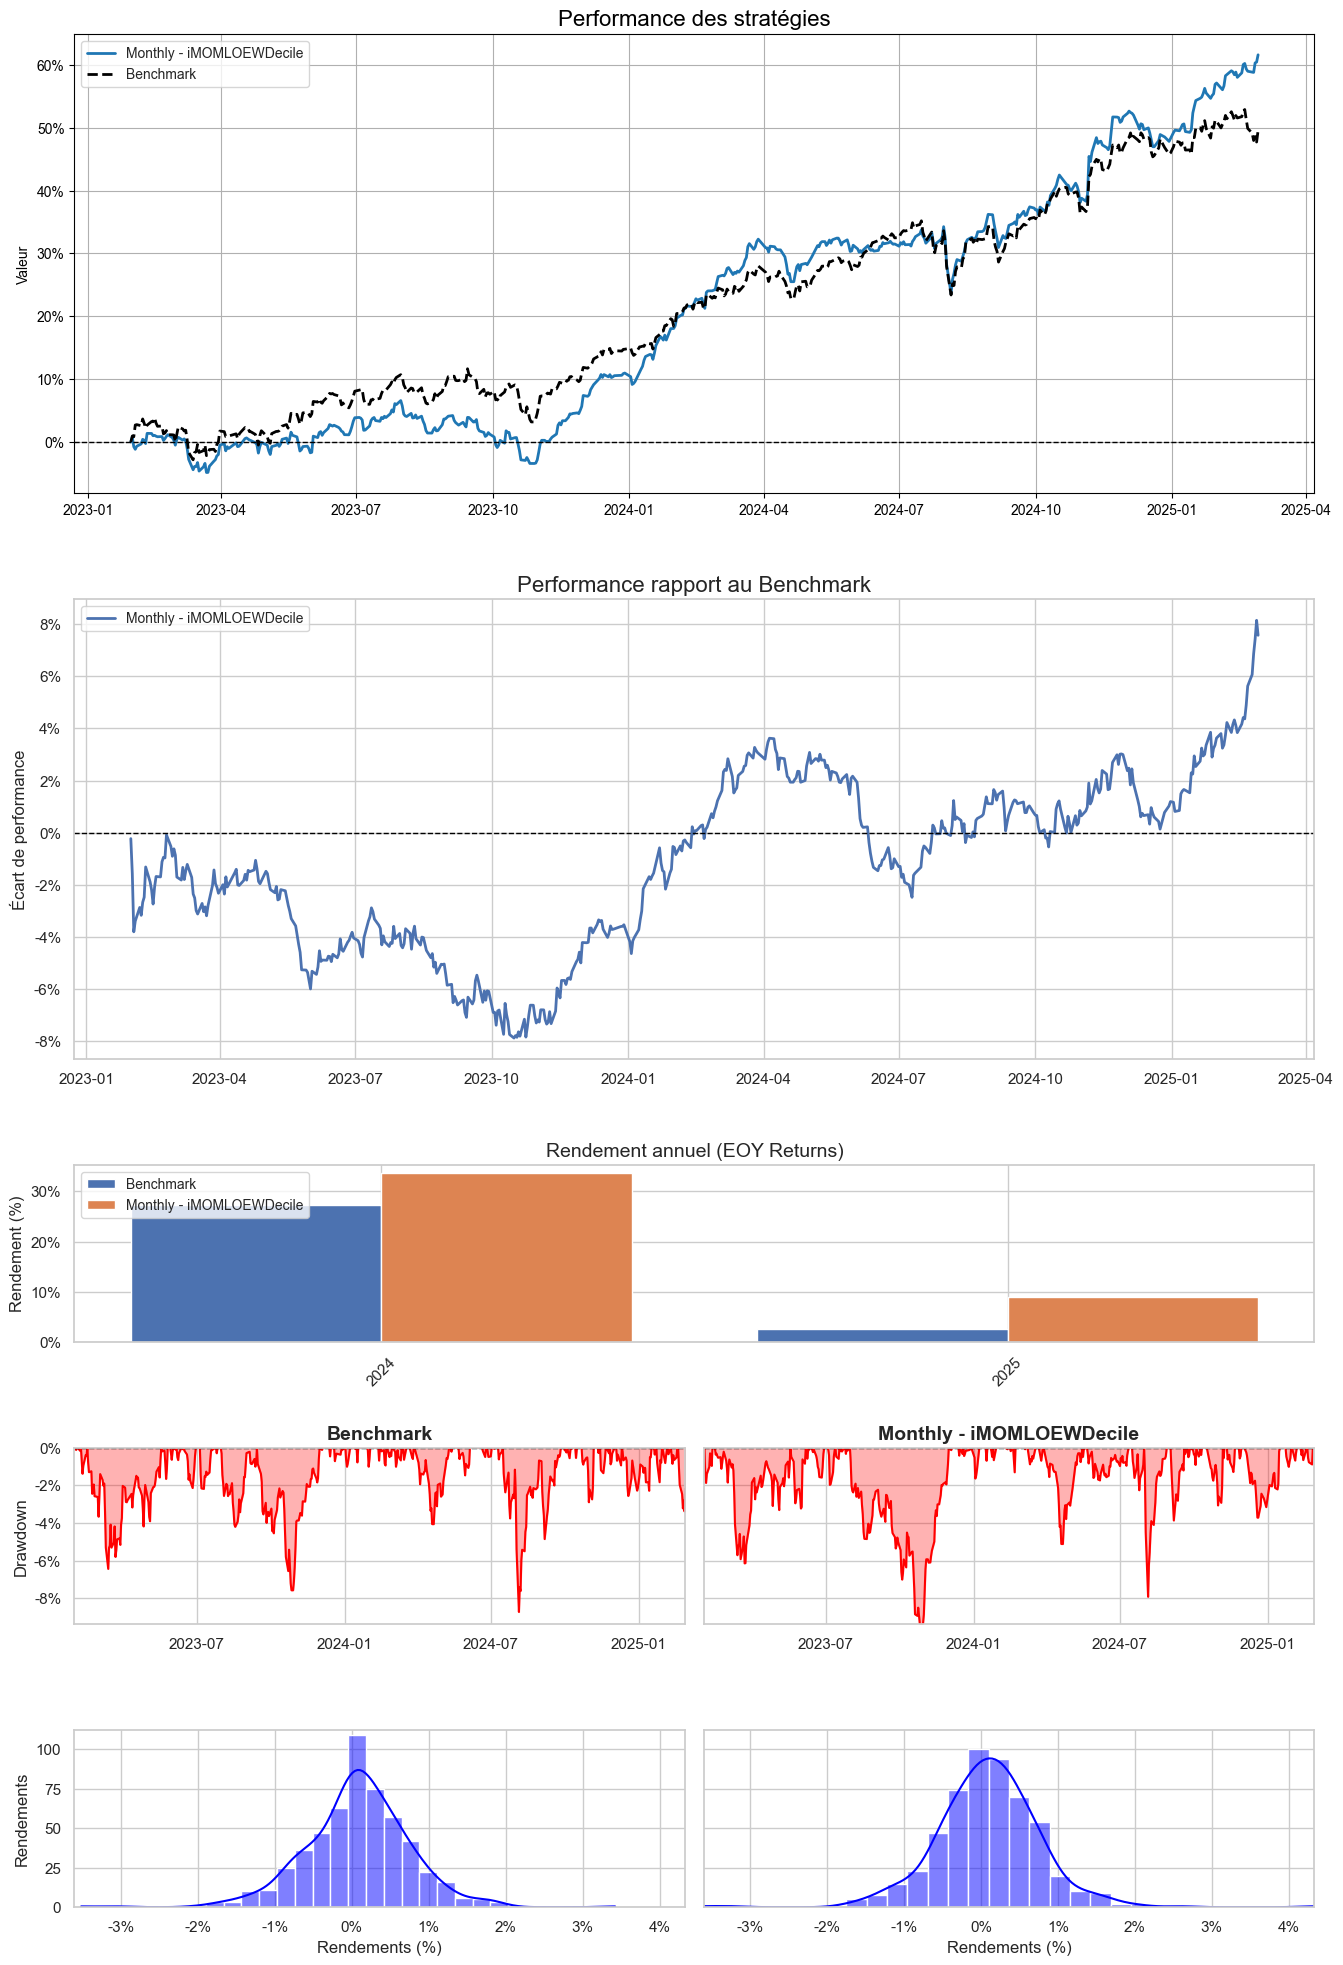

|                              | Benchmark   | Monthly - iMOMLOEWDecile   |
|:-----------------------------|:------------|:---------------------------|
| Performance                  | 49.56%      | 61.59%                     |
| CAGR                         | 20.75%      | 25.21%                     |
| Volatility                   | 10.87%      | 10.87%                     |
| Max Drawdown                 | -8.73%      | -9.39%                     |
| Sharpe Ratio                 | 1.79        | 2.13                       |
| Annualized Transactions Cost | 0.00%       | 0.00%                      |
| Tracking Error               | 0.0         | 6.41%                      |


In [10]:
MiMOMLOEWDecile.visualize()

In [11]:
# En registre en pikle MiMOMLOEWDecile
import pickle

with open('MiMOMLOEWDecile.pickle', 'wb') as f:
    pickle.dump(MiMOMLOEWDecile, f)

In [12]:
# Load le pickle
with open('MiMOMLOEWDecile.pickle', 'rb') as f:
    loaded = pickle.load(f)

/Users/julesmourgues/Documents/Cours/Master Dauphine/AM Comportementale/AM 3/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


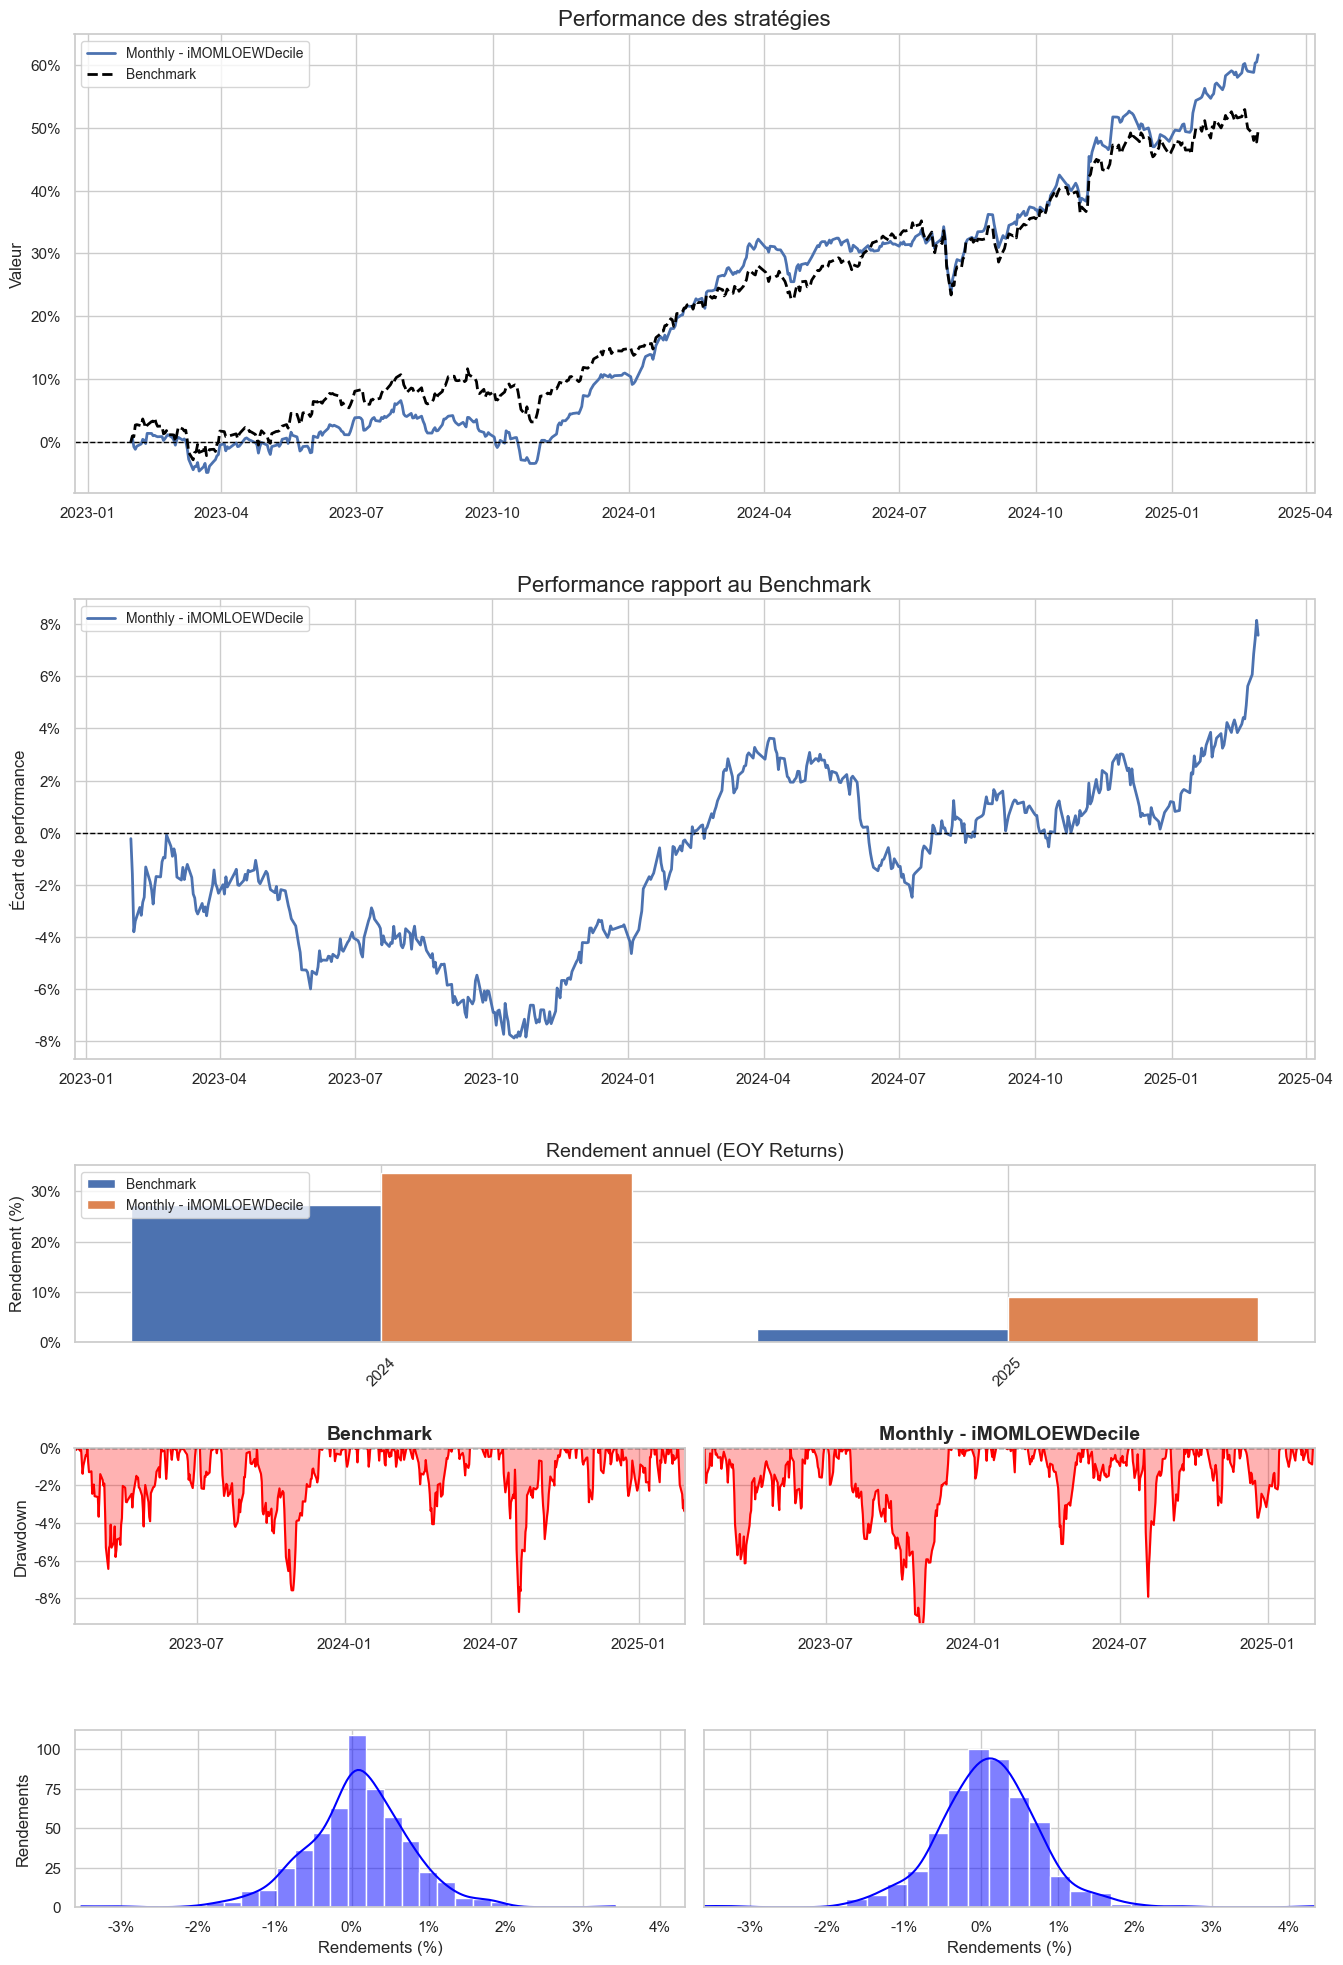

|                              | Benchmark   | Monthly - iMOMLOEWDecile   |
|:-----------------------------|:------------|:---------------------------|
| Performance                  | 49.56%      | 61.59%                     |
| CAGR                         | 20.75%      | 25.21%                     |
| Volatility                   | 10.87%      | 10.87%                     |
| Max Drawdown                 | -8.73%      | -9.39%                     |
| Sharpe Ratio                 | 1.79        | 2.13                       |
| Annualized Transactions Cost | 0.00%       | 0.00%                      |
| Tracking Error               | 0.0         | 6.41%                      |


In [13]:
loaded.visualize()